In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'


**folder sturucture**


                  daisy/
  
                  dandelion/
  
                  roses/
  
                  sunflowers/
      
                  tulips/

In [4]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)  
# include_top  ->whether to include the 3 fully-connected layers at the top of the network. 
# so we are not including the 3 FC layers

In [5]:
for layers in vgg16.layers:
    print(layers)

In [6]:
# these are the layers we are considering
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False  # freezing all the weights

In [7]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [8]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# In the summary Trainable params: 0  why ?
# because we have freezed all the  layers

In [10]:
# useful for getting number of output classes
folders = glob('flowers/train/*')

In [11]:
folders

['flowers/train\\daisy',
 'flowers/train\\dandelion',
 'flowers/train\\rose',
 'flowers/train\\sunflower',
 'flowers/train\\tulip']

In [12]:
len(folders)

5

In [13]:
model = Sequential()

model.add(vgg16)  # adding our pre-trained model
# adding the custom FC layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [18]:
test_set = test_datagen.flow_from_directory('flowers/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
19/19 [==============================] - 42s 1s/step - loss: 3.2090 - accuracy: 0.3950 - val_loss: 1.1527 - val_accuracy: 0.6167
Epoch 2/10
19/19 [==============================] - 11s 555ms/step - loss: 0.8178 - accuracy: 0.7133 - val_loss: 0.8681 - val_accuracy: 0.7100
Epoch 3/10
19/19 [==============================] - 11s 572ms/step - loss: 0.5717 - accuracy: 0.7850 - val_loss: 0.7122 - val_accuracy: 0.7433
Epoch 4/10
19/19 [==============================] - 11s 556ms/step - loss: 0.3939 - accuracy: 0.8783 - val_loss: 0.7954 - val_accuracy: 0.7233
Epoch 5/10
19/19 [==============================] - 28s 2s/step - loss: 0.3170 - accuracy: 0.9000 - val_loss: 0.7495 - val_accuracy: 0.7433
Epoch 6/10
19/19 [==============================] - 13s 656ms/step - loss: 0.2328 - accuracy: 0.9433 - val_loss: 0.6635 - val_accuracy: 0.8100
Epoch 7/10
19/19 [==============================] - 11s 570ms/step - loss: 0.2224 - accuracy: 0.9300 - val_loss: 0.6844 - val_accuracy: 0.7733
Epoch

In [20]:
import matplotlib.pyplot as plt

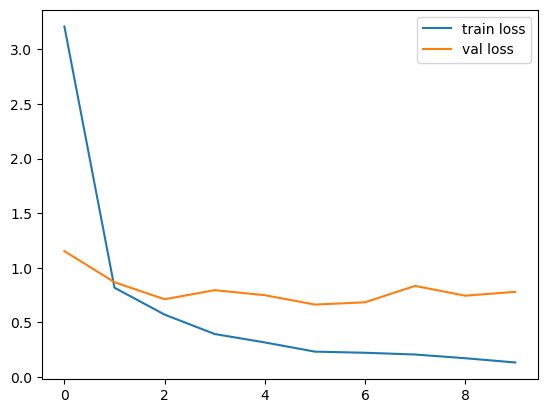

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

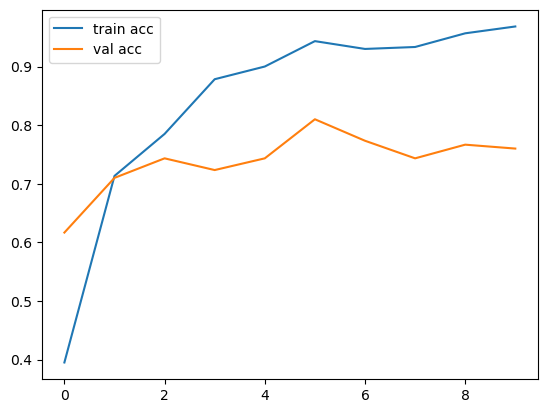

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [24]:
y_pred = model.predict(test_set)  # batch prediction

10/10 [==============================] - 3s 293ms/step


In [25]:
y_pred

array([[9.97015119e-01, 1.50209462e-06, 2.02071487e-06, 2.81934772e-05,
        2.95312284e-03],
       [1.41710698e-04, 1.44932172e-04, 1.50007203e-01, 8.42778623e-01,
        6.92746136e-03],
       [8.29029130e-04, 9.99142170e-01, 4.67440202e-07, 2.78672360e-05,
        4.62419735e-07],
       ...,
       [2.91096600e-04, 2.53460098e-06, 9.81119275e-01, 1.01886755e-02,
        8.39833822e-03],
       [8.23490415e-03, 9.92483328e-05, 7.36434221e-01, 8.09578691e-03,
        2.47135863e-01],
       [6.91489041e-01, 1.30118430e-01, 1.47010584e-03, 1.20249823e-01,
        5.66725209e-02]], dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1) # argmax will give the most probability value

In [27]:
y_pred

array([0, 3, 1, 2, 0, 2, 0, 4, 4, 0, 3, 0, 0, 4, 0, 0, 2, 0, 3, 0, 0, 3,
       2, 1, 0, 0, 1, 4, 4, 3, 2, 2, 2, 1, 1, 2, 2, 4, 2, 3, 0, 0, 2, 2,
       4, 2, 1, 0, 4, 4, 4, 4, 4, 1, 4, 3, 2, 2, 1, 0, 4, 2, 4, 4, 3, 4,
       4, 2, 1, 3, 0, 1, 3, 0, 2, 4, 0, 3, 4, 4, 3, 0, 4, 2, 2, 2, 4, 2,
       0, 0, 4, 1, 4, 3, 0, 0, 4, 0, 0, 2, 2, 0, 0, 2, 3, 1, 4, 3, 4, 0,
       1, 3, 0, 0, 4, 2, 4, 2, 1, 1, 4, 3, 2, 2, 4, 0, 4, 0, 1, 2, 2, 2,
       1, 0, 4, 0, 0, 1, 0, 3, 2, 4, 1, 4, 0, 4, 2, 2, 4, 4, 4, 3, 0, 2,
       1, 4, 1, 2, 2, 2, 3, 1, 4, 2, 4, 2, 3, 3, 3, 0, 1, 1, 4, 4, 1, 2,
       2, 3, 0, 0, 3, 4, 0, 3, 4, 4, 1, 1, 1, 4, 1, 4, 0, 4, 4, 0, 2, 2,
       2, 3, 0, 0, 4, 3, 2, 1, 0, 3, 4, 4, 0, 2, 0, 0, 3, 0, 4, 4, 1, 0,
       3, 2, 1, 2, 3, 0, 4, 4, 2, 3, 0, 4, 0, 3, 1, 2, 2, 0, 4, 4, 1, 0,
       2, 0, 3, 4, 4, 0, 4, 3, 4, 0, 1, 1, 4, 3, 4, 3, 2, 4, 0, 0, 0, 1,
       1, 3, 4, 1, 3, 2, 2, 0, 4, 1, 1, 4, 4, 2, 2, 4, 0, 3, 4, 3, 2, 1,
       4, 2, 2, 3, 4, 1, 4, 0, 2, 4, 2, 2, 2, 0], d

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_vgg16.h5')

In [30]:
img=image.load_img('OIP.jpeg',target_size=(224,224))

In [31]:
# performing single prediction on an image


In [32]:
# load the image
img=image.load_img('OIP.jpeg',target_size=(224,224))

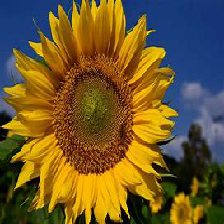

In [33]:
img

In [34]:
x=image.img_to_array(img)  # converting the image to arry
x

array([[[ 17.,  52., 116.],
        [ 17.,  52., 116.],
        [ 17.,  52., 116.],
        ...,
        [ 24.,  54., 114.],
        [ 23.,  53., 113.],
        [ 23.,  53., 113.]],

       [[ 17.,  52., 116.],
        [ 17.,  52., 116.],
        [ 17.,  52., 116.],
        ...,
        [ 24.,  54., 114.],
        [ 23.,  53., 113.],
        [ 23.,  53., 113.]],

       [[ 16.,  51., 115.],
        [ 16.,  51., 115.],
        [ 16.,  51., 115.],
        ...,
        [ 24.,  54., 116.],
        [ 23.,  53., 115.],
        [ 22.,  52., 114.]],

       ...,

       [[ 38.,  50.,   0.],
        [ 31.,  44.,   0.],
        [ 14.,  27.,   0.],
        ...,
        [ 31.,  52.,   9.],
        [ 25.,  43.,   5.],
        [ 28.,  44.,   8.]],

       [[ 39.,  51.,   5.],
        [ 23.,  36.,   0.],
        [  7.,  20.,   0.],
        ...,
        [ 30.,  51.,   8.],
        [ 25.,  43.,   5.],
        [ 34.,  50.,  14.]],

       [[ 42.,  53.,  10.],
        [ 19.,  31.,   0.],
        [  5.,  

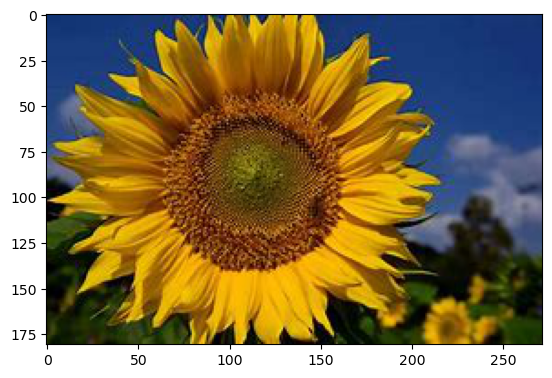

In [35]:
Z = plt.imread('OIP.jpeg')
plt.imshow(Z)

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255  # normalizing the image


In [38]:
# preprocessing the image

from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)  # explanding the dimention means that you need to add the batch dimention
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[5.8953594e-02, 9.3923378e-01, 1.5226989e-03, 2.8988405e-04,
        5.4330709e-08]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 27ms/step


In [41]:
flower_name = ['dandelion',
 'sunflower',
 'tulip',
 'daisy',
 'rose']

In [42]:
flower_name[a[0]]

'sunflower'